In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline 

In [ ]:
train_df = pd.read_csv('../input/landmark-recognition-challenge/train.csv.zip')
test_df = pd.read_csv('../input/landmark-recognition-challenge/test.csv.zip')
submission = pd.read_csv('../input/landmark-recognition-challenge/sample_submission.csv.zip')

In [ ]:
print("Train data shape -  rows:",train_df.shape[0]," columns:", train_df.shape[1])
print("Test data size -  rows:",test_df.shape[0]," columns:", test_df.shape[1])

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
submission.head()

In [ ]:
# missing data in training data set
missing = train_df.isnull().sum()
all_val = train_df.count()

missing_train_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_train_df

In [ ]:
# missing data in training data set
missing = test_df.isnull().sum()
all_val = test_df.count()

missing_test_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_test_df

In [ ]:
train_df.nunique()

In [ ]:
test_df.nunique()

In [ ]:
# concatenate train and test datasets
concatenated = pd.concat([train_df, test_df])
# print the shape of the resulted data.frame
concatenated.shape

In [ ]:
concatenated.nunique()

In [ ]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id density plot')
sns.kdeplot(train_df['landmark_id'], color="tomato", shade=True)
plt.show()

In [ ]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id distribuition and density plot')
sns.distplot(train_df['landmark_id'],color='green', kde=True,bins=100)
plt.show()

In [ ]:
th10 = pd.DataFrame(train_df.landmark_id.value_counts().head(10))
th10.reset_index(level=0, inplace=True)
th10.columns = ['landmark_id','count']
th10

In [ ]:
# Plot the most frequent landmark occurences
plt.figure(figsize = (6, 6))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=th10,
            label="Count", color="darkgreen")
plt.show()

In [ ]:
tb10 = pd.DataFrame(train_df.landmark_id.value_counts().tail(10))
tb10.reset_index(level=0, inplace=True)
tb10.columns = ['landmark_id','count']
tb10

In [ ]:
# Plot the least frequent landmark occurences
plt.figure(figsize = (6,6))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=tb10,
            label="Count", color="orange")
plt.show()

In [ ]:
# Extract repositories names for train data
ll = list()
for path in train_df['url']:
    ll.append((path.split('//', 1)[1]).split('/', 1)[0])
train_df['site'] = ll
# Extract repositories names for test data
ll = list()
for path in test_df['url']:
    ll.append((path.split('//', 1)[1]).split('/', 1)[0])
test_df['site'] = ll

In [ ]:
print("Train data shape -  rows:",train_df.shape[0]," columns:", train_df.shape[1])
print("Test data size -  rows:",test_df.shape[0]," columns:", test_df.shape[1])

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
train_site = pd.DataFrame(train_df.site.value_counts())
test_site = pd.DataFrame(test_df.site.value_counts())

In [ ]:
train_site

In [ ]:
trsite = pd.DataFrame(list(train_site.index),train_site['site'])
trsite.reset_index(level=0, inplace=True)
trsite.columns = ['count','site']
plt.figure(figsize = (6,6))
plt.title('Sites storing images - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'site', y="count", data=trsite, color="blue")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [ ]:
test_site

In [ ]:
tesite = pd.DataFrame(list(test_site.index),test_site['site'])
tesite.reset_index(level=0, inplace=True)
tesite.columns = ['count','site']
plt.figure(figsize = (6,6))
plt.title('Sites storing images - test dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'site', y="count", data=tesite, color="magenta")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [ ]:
def displayLandmark(urls, landmarkName):
    
    img_style = "height: 60px; margin: 2px; float: left; border: 1px solid blue;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.iteritems()])

    display(HTML(images_list))

In [ ]:
IMAGES_NUMBER = 60
landmarkId = train_df['landmark_id'].value_counts().keys()[5]
urls = train_df[train_df['landmark_id'] == landmarkId]['url'].head(IMAGES_NUMBER)
displayLandmark(urls, "Petronas")

In [ ]:
urls.head(1)

In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS


class ImageMetaData(object):
    '''
    Extract the exif data from any image. Data includes GPS coordinates, 
    Focal Length, Manufacture, and more.
    '''
    exif_data = None
    image = None

    def __init__(self, img_path):
        self.image = Image.open(img_path)
        print(self.image._getexif())
        #self.get_exif_data()
        #super(ImageMetaData, self).__init__()

    def get_exif_data(self):
        """Returns a dictionary from the exif data of an PIL Image item. Also converts the GPS Tags"""
        exif_data = {}
        info = self.image._getexif()
        if info:
            for tag, value in info.items():
                decoded = TAGS.get(tag, tag)
                if decoded == "GPSInfo":
                    gps_data = {}
                    for t in value:
                        sub_decoded = GPSTAGS.get(t, t)
                        gps_data[sub_decoded] = value[t]

                    exif_data[decoded] = gps_data
                else:
                    exif_data[decoded] = value
        self.exif_data = exif_data
        return exif_data

    def get_if_exist(self, data, key):
        if key in data:
            return data[key]
        return None

    def convert_to_degress(self, value):

        """Helper function to convert the GPS coordinates 
        stored in the EXIF to degress in float format"""
        d0 = value[0][0]
        d1 = value[0][1]
        d = float(d0) / float(d1)

        m0 = value[1][0]
        m1 = value[1][1]
        m = float(m0) / float(m1)

        s0 = value[2][0]
        s1 = value[2][1]
        s = float(s0) / float(s1)

        return d + (m / 60.0) + (s / 3600.0)

    def get_lat_lng(self):
        """Returns the latitude and longitude, if available, from the provided exif_data (obtained through get_exif_data above)"""
        lat = None
        lng = None
        exif_data = self.get_exif_data()
        #print(exif_data)
        if "GPSInfo" in exif_data:      
            gps_info = exif_data["GPSInfo"]
            gps_latitude = self.get_if_exist(gps_info, "GPSLatitude")
            gps_latitude_ref = self.get_if_exist(gps_info, 'GPSLatitudeRef')
            gps_longitude = self.get_if_exist(gps_info, 'GPSLongitude')
            gps_longitude_ref = self.get_if_exist(gps_info, 'GPSLongitudeRef')
            if gps_latitude and gps_latitude_ref and gps_longitude and gps_longitude_ref:
                lat = self.convert_to_degress(gps_latitude)
                if gps_latitude_ref != "N":                     
                    lat = 0 - lat
                lng = self.convert_to_degress(gps_longitude)
                if gps_longitude_ref != "E":
                    lng = 0 - lng
        return lat, lng


In [ ]:
# submit the most freq label
submission['landmarks'] = '%d %2.2f' % (freq_label.index[0], freq_label.values[0])
submission.to_csv('submission.csv', index=False)

np.random.seed(2018)
r_idx = lambda : np.random.choice(freq_label.index, p = freq_label.values)

r_score = lambda idx: '%d %2.4f' % (freq_label.index[idx], freq_label.values[idx])
submission['landmarks'] = submission.id.map(lambda _: r_score(r_idx()))
submission.to_csv('rand_submission.csv', index=False)

In [116]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
train_data = pd.read_csv('../input/landmark-recognition-challenge/train.csv.zip')
test_data = pd.read_csv('../input/landmark-recognition-challenge/test.csv.zip')
submission = pd.read_csv("../input/landmark-recognition-challenge/sample_submission.csv.zip")

print("Training data size",train_data.shape)
print("test data size",test_data.shape)
submission.head()

Training data size (1225029, 3)
test data size (117703, 2)


,id,landmarks
0,000088da12d664db,8815 0.03
1,0001623c6d808702,7249 0.61
2,0001bbb682d45002,5328 0.5
3,0002362830cfe3a3,4188 0.96
4,000270c9100de789,10506 0.82


In [120]:
test_data.head()

,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...


In [121]:
# now open the URL
temp = 4444
print('id', train_data['id'][temp])
print('url:', train_data['url'][temp])
print('landmark id:', train_data['landmark_id'][temp])

id a6c207c04d7c3835
url: https://lh5.googleusercontent.com/-oJsiYZW1JPE/Rnah5Zf5XxI/AAAAAAAAADY/tLtMU5hCdlI/s1600/
landmark id: 233


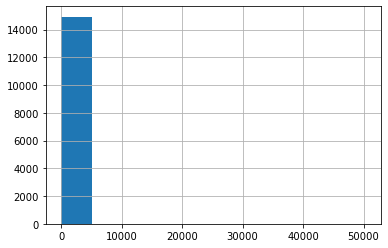

In [122]:
train_data['landmark_id'].value_counts().hist()

In [123]:
# missing data in training data 
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
landmark_id,0,0.0
url,0,0.0
id,0,0.0


In [124]:
# missing data in test data 
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

,Total,Percent
url,0,0.0
id,0,0.0


In [125]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,9633,50337
1,6051,50148
2,6599,23415
3,9779,18471
4,2061,13271
5,5554,11147
6,6651,9508
7,6696,9222


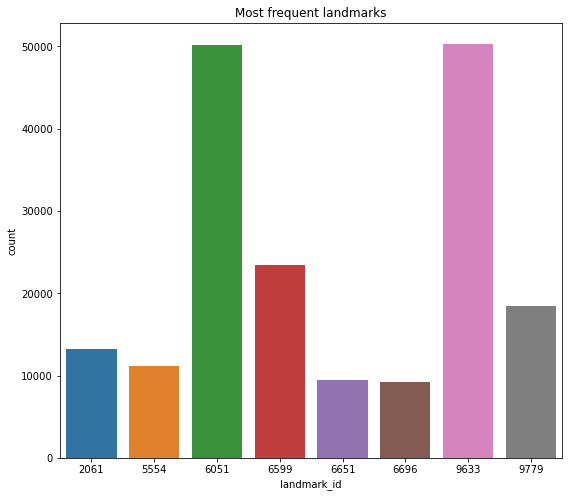

In [126]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [127]:
# Occurance of landmark_id in increasing order
temp = pd.DataFrame(train_data.landmark_id.value_counts().tail(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,4753,1
1,6261,1
2,4144,1
3,1527,1
4,6025,1
5,4334,1
6,5865,1
7,8381,1


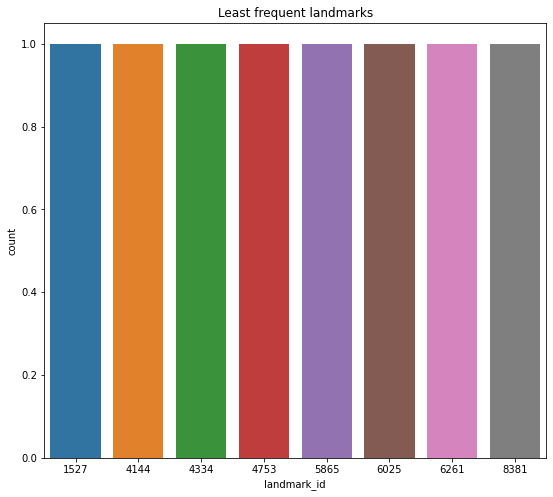

In [128]:

# Plot the least frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [129]:
# Unique URL's
train_data.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

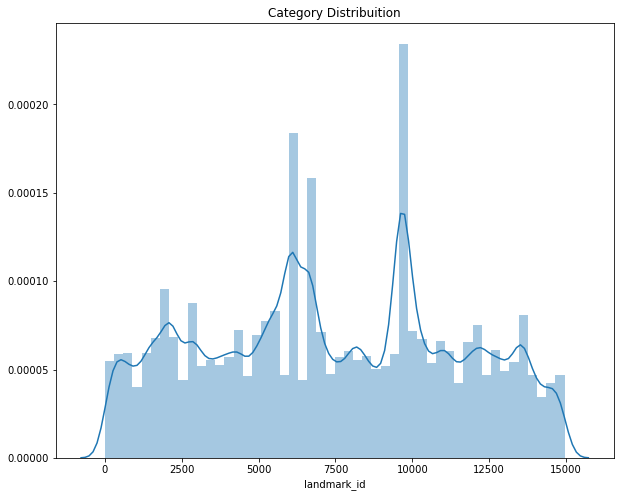

In [130]:
#Class distribution
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['landmark_id'])

plt.show()

In [131]:

print("Number of classes under 20 occurences",(train_data['landmark_id'].value_counts() <= 20).sum(),'out of total number of categories',len(train_data['landmark_id'].unique()))

Number of classes under 20 occurences 8797 out of total number of categories 14951


In [132]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [133]:
category = train_data['landmark_id'].value_counts().keys()[0]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")

In [134]:
# Extract site_names for train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['site_name'] = temp_list
# Extract site_names for test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['site_name'] = temp_list

In [135]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

Training data size (1225029, 4)
test data size (117703, 3)


In [136]:
train_data.head(8)

,id,url,landmark_id,site_name
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676,static.panoramio.com
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651,lh6.ggpht.com
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284,lh6.ggpht.com
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429,lh3.googleusercontent.com
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231,lh5.googleusercontent.com
5,2c9c54b62f0a6a37,https://lh5.googleusercontent.com/-mEaSECO7D-4...,10400,lh5.googleusercontent.com
6,0aac70a1de44ced6,http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/...,9779,lh6.ggpht.com
7,de770bc720f8e714,https://lh4.googleusercontent.com/-Q_FvRlwaaa8...,11288,lh4.googleusercontent.com


In [137]:
test_data.head()

,id,url,site_name
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...,lh3.googleusercontent.com
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...,lh3.googleusercontent.com
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...,lh3.googleusercontent.com
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...,lh3.googleusercontent.com
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...,lh3.googleusercontent.com


In [138]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(train_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,182010
1,lh4.googleusercontent.com,177774
2,lh5.googleusercontent.com,175251
3,lh6.googleusercontent.com,171506
4,lh3.ggpht.com,105043
5,lh4.ggpht.com,102460
6,lh6.ggpht.com,102066
7,lh5.ggpht.com,100905
8,mw2.google.com,94947
9,static.panoramio.com,12468


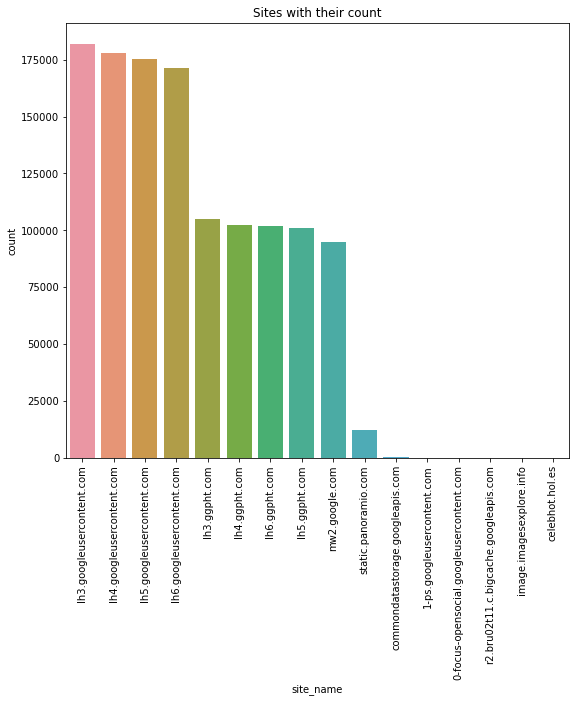

In [139]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [140]:
# Occurance of site in decreasing order(Top categories)
temp = pd.DataFrame(test_data.site_name.value_counts())
temp.reset_index(inplace=True)
temp.columns = ['site_name','count']
temp

,site_name,count
0,lh3.googleusercontent.com,116855
1,lh3.ggpht.com,166
2,lh5.ggpht.com,134
3,lh4.ggpht.com,123
4,images1-focus-opensocial.googleusercontent.com,102
5,lh6.ggpht.com,92
6,lh5.googleusercontent.com,80
7,lh4.googleusercontent.com,55
8,static.panoramio.com,47
9,lh6.googleusercontent.com,28


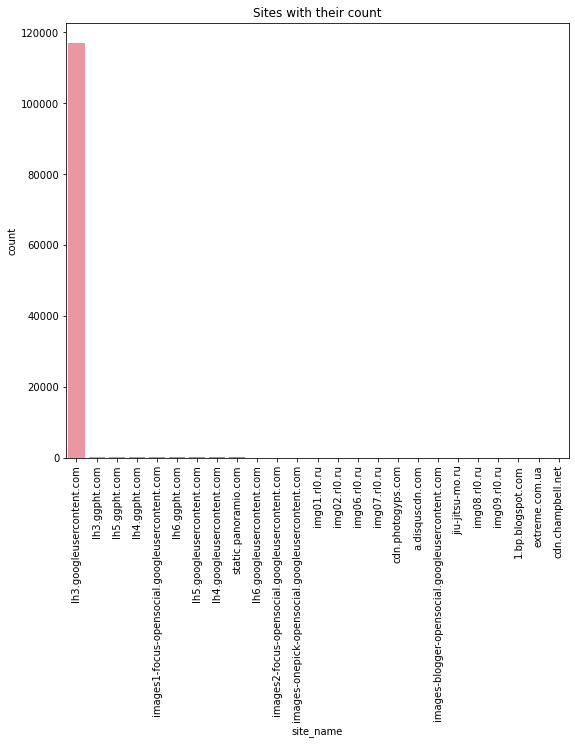

In [141]:
# Plot the Sites with their count
plt.figure(figsize = (9, 8))
plt.title('Sites with their count')
sns.set_color_codes("pastel")
sns.barplot(x="site_name", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()